In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer

# Loading Titanic Dataset

In [2]:
df=pd.read_csv("train.csv") #Loading dataset
df.drop(columns=["PassengerId","Name","Cabin","Ticket"],inplace=True) #Dropping less important columns
df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# EDA

<Axes: xlabel='Age', ylabel='Fare'>

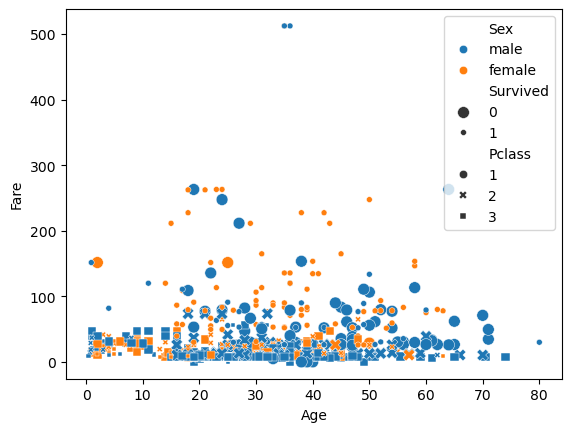

In [3]:
import seaborn as sns
sns.scatterplot(x=df["Age"],y=df["Fare"],hue=df["Sex"],style=df["Pclass"],size=df['Survived'])
# plotting simple scatter graph

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(
    df.drop(columns=["Survived"]),
    df[["Survived"]],
    test_size=0.2,
    random_state=42)

# Column Transformer

In [5]:
#using simple imputer to fill missing values

from sklearn.impute import SimpleImputer
trf1=ColumnTransformer(
    [
        ('impute_age',SimpleImputer(),[2]),
        ('impute_embarked',SimpleImputer(strategy="most_frequent"),[6])
    ],remainder="passthrough"
)


In [6]:
#Using OneHotEncoder to encode cetagorical columns

from sklearn.preprocessing import OneHotEncoder
trf2=ColumnTransformer(
    [
        ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[1,6])
    ],remainder="passthrough"
)

In [7]:
#Using MinMaxScaler to scale all columns

from sklearn.preprocessing import MinMaxScaler
trf3=ColumnTransformer(
    [
        ('sacler',MinMaxScaler(),slice(0,10))
    ]
)

In [8]:
#Main algorithm for this project

from sklearn.tree import DecisionTreeClassifier
trf4=DecisionTreeClassifier()

# PipeLine

In [9]:
from sklearn.pipeline import Pipeline
pipe=Pipeline(
    [
        ('trf1',trf1),
        ('trf2',trf2),
        ('trf3',trf3),
        ('trf4',trf4)
    ]
)

# Model Training

In [10]:
pipe.fit(X_train,Y_train)
prediction=pipe.predict(X_test)

# Accuracy Score

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)

0.6256983240223464

In [14]:
import pickle

pickle.dump(pipe,open('pipe.pkl', 'wb'))